In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline
sns.set(color_codes=True)
pd.options.mode.chained_assignment = None  # default='warn'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Consumer_Complaints.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [ ]:
#finding the datatyoes of each column

df.dtypes        #all the attribute are objects => need to change them into numerical (int / float)

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [ ]:
# The shape of the dataframe. Data has 670598 entries

df.shape

(670598, 18)

In [ ]:
#checking if there is any repeated rows in dataframe
a=df.duplicated()
a[a==True].count() #0 returns that there are no repeated rows.

0

In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows        #empty dataframe => means no repeated row.

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID


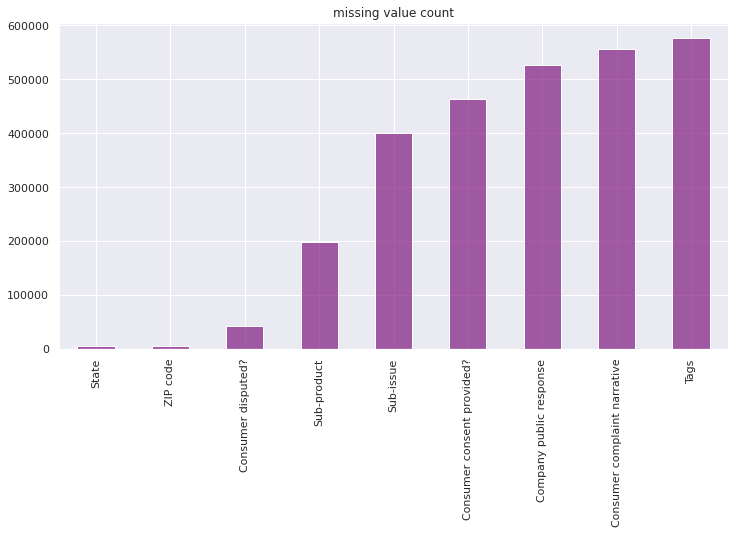

In [ ]:
#those features which have high number of Nans values wil be removed from the dataframe

missing_data=df.isnull().sum()
missing_data[missing_data>0].\
sort_values(ascending=True).\
plot(kind='bar',figsize=(12,6),color=(0.5, 0.1, 0.5, 0.7))
plt.title('missing value count')
plt.show()              #only these features have issing values (9/18) tags column has the highest number of Nans
                        #its better to remove this column than to fillna method.

In [ ]:
#checking all features name to see which of them are most relevent in order to delete them from the dataframe

df_removed=df.copy()         # a new dataframe created that holds only significant features.

df_removed.drop(['Date received','ZIP code','Tags','Date sent to company','Complaint ID'],axis=1,inplace=True)

In [ ]:
# Check for the missing values in each columns. 

df_removed.isnull().sum()

Product                              0
Sub-product                     198202
Issue                                0
Sub-issue                       400730
Consumer complaint narrative    555894
Company public response         525401
Company                              0
State                             5305
Consumer consent provided?      462447
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?               41419
dtype: int64

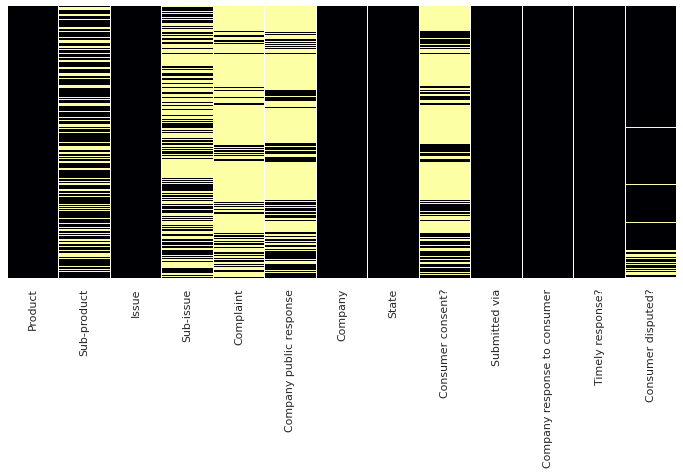

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df_removed.isnull(),yticklabels=False,cbar=False,cmap='inferno',ax=ax) 

#this plot shows Consumer complaint narrative and Company public response has huge number of missing data.(more than half)
#these 2 columns need to be treated.  => deleting the rows with Nan in these 2 columns.

In [ ]:
# changing the features name to shorter ones

df_removed.rename(columns={"Consumer complaint narrative": "Complaint" ,
                   "Consumer consent provided?" : "Consumer consent?",
                  
                  }, inplace=True)
df_removed.head(n=1)

,Product,Sub-product,Issue,Sub-issue,Complaint,Company public response,Company,State,Consumer consent?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,NaN,Phone,Closed with explanation,Yes,No


In [ ]:
#a new data1 dataframe is created to predict product and issues from complaints
#so i deleted those entries which have Nan complaints

data1 = df_removed[df_removed['Complaint'].notna()]
data1.shape
data1.isnull().sum()      #to recheck if product, issues and complaints have any Nans

Product                             0
Sub-product                     35784
Issue                               0
Sub-issue                       57448
Complaint                           0
Company public response         57417
Company                             0
State                             348
Consumer consent?                   0
Submitted via                       0
Company response to consumer        0
Timely response?                    0
Consumer disputed?               8421
dtype: int64

In [ ]:
#to shrink the size of dataframe i am dropping every row containing na.
data1.dropna(inplace=True,axis=0)

data1.shape

(13333, 13)

# product and issue classification using complaints


In [ ]:
#creating a new dataframe to hold complaint texts, products and issues

df_predict=pd.DataFrame(data1["Complaint"]).copy()
df_predict.rename(columns={ 0:'Complaint'}, inplace=True)
df_predict['Product']=data1['Product']
df_predict['Issue']=data1['Issue']
df_predict.head()

,Complaint,Product,Issue
57874,This is a continuation of a previous issue wit...,Student loan,Can't repay my loan
57945,"I took out a Loan from Cash Central XXXX, Al f...",Payday loan,Can't stop charges to bank account
57988,I find this medical debt reported on my credit...,Debt collection,Cont'd attempts collect debt not owed
58001,I received a letter from Penn Credit Collectio...,Debt collection,False statements or representation
58025,This gentleman called me and asked for persona...,Debt collection,Communication tactics


# text Cleaning

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#importing nltk package
import nltk
nltk.download('punkt')

In [ ]:
#converting the whole text into lower case for uniformity

import string
df_predict['Complaint'] = [doc.lower() for doc in df_predict['Complaint']]
df_predict.head()              

,Complaint,Product,Issue
57874,this is a continuation of a previous issue wit...,Student loan,Can't repay my loan
57945,"i took out a loan from cash central xxxx, al f...",Payday loan,Can't stop charges to bank account
57988,i find this medical debt reported on my credit...,Debt collection,Cont'd attempts collect debt not owed
58001,i received a letter from penn credit collectio...,Debt collection,False statements or representation
58025,this gentleman called me and asked for persona...,Debt collection,Communication tactics


In [ ]:
# word tokenize, a new feature is added in the df_predict to store the tokenized words w.r.t the complaints. 

from nltk.tokenize import word_tokenize

df_predict['Complaint_tokenize']=df_predict['Complaint']
for i in range(df_predict.shape[0]):
    df_predict['Complaint_tokenize'].iloc[i]=word_tokenize(df_predict['Complaint_tokenize'].iloc[i])

df_predict.head(n=2)

,Complaint,Product,Issue,Complaint_tokenize
57874,this is a continuation of a previous issue wit...,Student loan,Can't repay my loan,"[this, is, a, continuation, of, a, previous, i..."
57945,"i took out a loan from cash central xxxx, al f...",Payday loan,Can't stop charges to bank account,"[i, took, out, a, loan, from, cash, central, x..."


In [ ]:
import re
from nltk.tokenize import word_tokenize
regex = re.compile('[%s]' % re.escape(string.punctuation))  #regular expression to eleminate punctuations from the text.

#Removing punctuations like ,'; . _ # ! from the complaint texts to make them regular.

for i in range(df_predict.shape[0]):
  tokens=df_predict['Complaint_tokenize'].iloc[i]
  words = [word for word in tokens if word.isalpha()]
  df_predict['Complaint_tokenize'].iloc[i]=words


In [ ]:
# removing stop words from the complaints like i, am , is, are, myself they occur in abundance in almost every entries and
#provide no relevent information to the training model.

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

for i in range(df_predict.shape[0]):
  token=df_predict['Complaint_tokenize'].iloc[i]
  token = [w for w in token if not w in stop_words]
  df_predict['Complaint_tokenize'].iloc[i]=token


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#here in this cell i am applying lemmatizing technique to bring the tokenized words into the original first form words in order to
# to reduce the noise in data. 

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

for i in range(df_predict.shape[0]):
  stem=df_predict['Complaint_tokenize'].iloc[i]
  lema= [lemmatizer.lemmatize(word) for word in stem]
  df_predict['Complaint_tokenize'].iloc[i]=lema

df_predict.head(n=3)
  


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Complaint,Product,Issue,Complaint_tokenize
57874,this is a continuation of a previous issue wit...,Student loan,Can't repay my loan,"[continuation, previous, issue, citibank, reac..."
57945,"i took out a loan from cash central xxxx, al f...",Payday loan,Can't stop charges to bank account,"[took, loan, cash, central, xxxx, al, sense, t..."
57988,i find this medical debt reported on my credit...,Debt collection,Cont'd attempts collect debt not owed,"[find, medical, debt, reported, credit, report..."


# training the model

In [ ]:
# Now as Complaint_tokenize contains the seperated words after applying text cleaning
#to pass them through count vectorization and Tdif vectorization, I am combining the words of the df_predict['Complaint_tokenize'] into 
#single paragraph

for i in range(df_predict.shape[0]):
  temp=df_predict['Complaint_tokenize'].iloc[i]
  temp=' '.join(temp)
  df_predict['Complaint_tokenize'].iloc[i]=temp


In [ ]:
#importing important libraries 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB


# dataset splitting

Product prediction

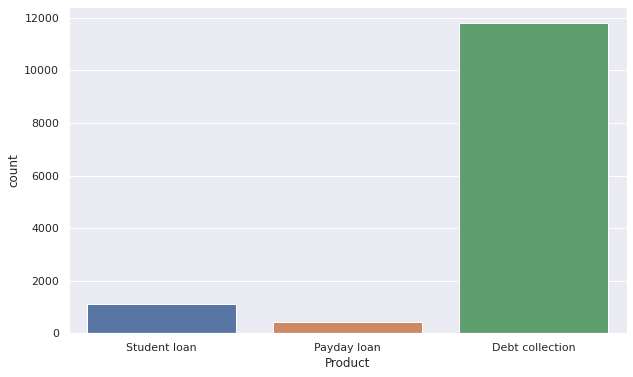

In [ ]:
#lets have a look on number of unique product and their count in the dataset
plt.figure(figsize=(10,6))
sns.countplot(x = df_predict['Product'],data = df_predict)                #the dataset contains three categories of product
                                                                          #most of them are Debt Collection

In [ ]:
#here I am splitting the dataset into 70-30 ratio by using the  test_size=0.30

from sklearn.model_selection import train_test_split 
x=df_predict['Complaint_tokenize']
y=df_predict['Product']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
#I have implemented the pipeline to combine the different steps of tdif vectorization and model training.
# i have used mutlionomial naive bayes classification for model training
from sklearn.pipeline import Pipeline
product_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

product_clf .fit(X_train, y_train)

In [ ]:
#the pipeline function has done most of the part, only thing left is to transform and predict the products through test data.

predicted_product = product_clf.predict(X_test)

Accuracy achieved is 0.89225


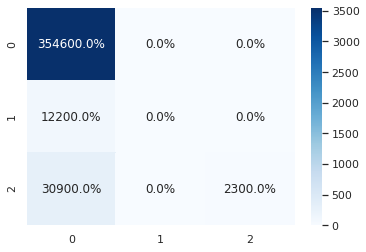

In [ ]:
#evaluating the performance of product prediction model from accuracy and confusion matrix.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score                        

print('Accuracy achieved is ' + str(np.mean(predicted_product== y_test)))

p_matrix = confusion_matrix(y_test, predicted_product)                 #The accuracy is 89.2% which proves it to be a good fit.
                                                                       #the prediction is quite accurate as we can see TP has the highest count.
sns.heatmap(p_matrix, annot=True, fmt='.1%', cmap='Blues')             #true positive = 3546
                                                                       #False positive rate = 23

Issue Prediction

In [ ]:
#similaryly i have taken the same test size in issue prediction as well 
#the only difference here is the target label which is Issue

x=df_predict['Complaint']
y=df_predict['Issue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


# i am using the same method to predict it

Issue_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])
Issue_clf.fit(X_train, y_train)

In [ ]:
predicted_Issue = Issue_clf.predict(X_test)

In [ ]:
#Evaluating the performance = > originally the accuracy of issue prediction model is 40% 

print('Accuracy achieved is ' + str(np.mean(predicted_Issue== y_test)))

Accuracy achieved is 0.4015


In [ ]:
#checking the accuracy of normalized Complaints including removal of stop words and punctuation, tokenization, lemmatizing and stemming

x=df_predict['Complaint_tokenize']
y=df_predict['Issue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
Issue_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

Issue_clf.fit(X_train, y_train)

In [ ]:
predicted_Issue = Issue_clf.predict(X_test)              #accuracy has improved to 1%
print('Accuracy achieved is ' + str(np.mean(predicted_Issue== y_test)))

Accuracy achieved is 0.406


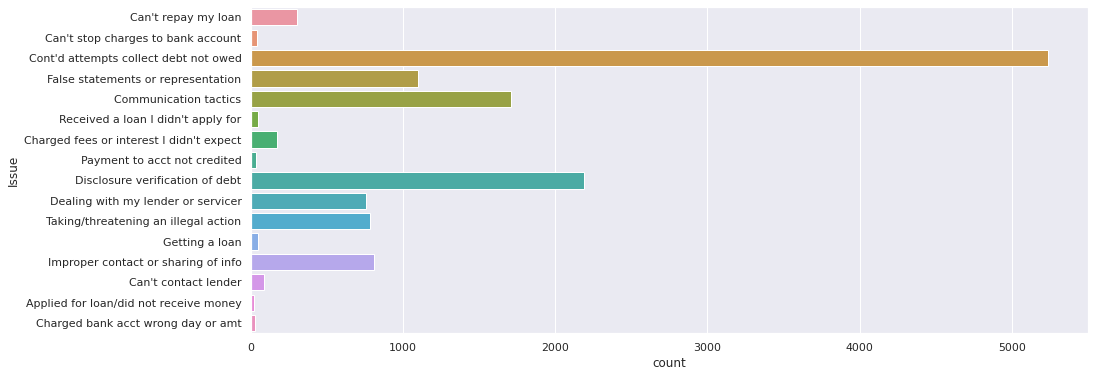

In [ ]:
#finding out the different values of issue and their counts

plt.figure(figsize=(15,6))
sns.countplot(y= df_predict['Issue'],data = df_predict)
                                                                #it can be seen that there is a great variation, some of them barely 
                                                                #possess a dominent positon in the graph

In [ ]:
#trying other optimzation techniques to increase the accuracy.

#here i printed the most common issue in the dataset. i would be deleting the least frequncy issues
#so that the model fits the dataset well. 

print(df_predict.groupby(['Issue']).count().sort_values("Complaint", ascending=False).head(),"\n")
dummy=df_predict.groupby(['Issue']).count().sort_values("Complaint", ascending=True).tail().index     #fetching the least occurence 5 categories.
dummy                #a new variable holding least occurence issues.

                                       Complaint  Product  Complaint_tokenize
Issue                                                                        
Cont'd attempts collect debt not owed       5240     5240                5240
Disclosure verification of debt             2186     2186                2186
Communication tactics                       1706     1706                1706
False statements or representation          1094     1094                1094
Improper contact or sharing of info          808      808                 808 



Index(['Improper contact or sharing of info',
       'False statements or representation', 'Communication tactics',
       'Disclosure verification of debt',
       'Cont'd attempts collect debt not owed'],
      dtype='object', name='Issue')

In [ ]:
#creating a new dataframe to deal with this occurence issue

df_predict_modified=pd.DataFrame(df_predict['Issue']).copy()
df_predict_modified['Complaint_tokenize']=df_predict['Complaint_tokenize']                
df_predict_modified.rename(columns={ 0:'Issue'}, inplace=True)
#df_predict_modified.set_index("Issue",inplace=True)
df_predict_modified.shape

(13333, 2)

In [ ]:
#here i am deleting those rows which have least occurence issue as output.

data2 = df_predict_modified[~df_predict_modified['Issue'].isin(dummy)]


In [ ]:
#training the new dataframe with the same method as before.

x=data2['Complaint_tokenize']
y=data2['Issue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
data2.astype('U')                       #converting the datatype.
data2['Complaint_tokenize'].astype('U')

In [ ]:
Issue_clf11 = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])
Issue_clf11.fit(X_train, y_train)

In [ ]:
predicted_Issue = Issue_clf11.predict(X_test)              #the accuracy has increased upto 18%.
print('Accuracy achieved is ' + str(np.mean(predicted_Issue== y_test)))                                              

Accuracy achieved is 0.5811594202898551


## Normalize Country Names

In [ ]:
#creating a new df => company to normalize it 
company=pd.DataFrame(data1['Company'].copy())

In [ ]:
#1) converting it into lower case
company['Company'] = [doc.lower() for doc in company['Company']]
company.head(n=2)

,Company
57874,citibank
57945,"community choice financial, inc."


In [ ]:
#2)Word tokenization
from nltk.tokenize import word_tokenize

company['tokenized_company'] = [word_tokenize(doc) for doc in company['Company']]
company.head(n=2)

,Company,tokenized_company
57874,citibank,[citibank]
57945,"community choice financial, inc.","[community, choice, financial, ,, inc, .]"


In [ ]:
#3) Removing punctuations ,'; . _ # ! from the company texts

for i in range(company.shape[0]):
  tokens=company['tokenized_company'].iloc[i]
  words = [word for word in tokens if word.isalpha()]
  company['tokenized_company'].iloc[i]=words

company.head(n=2)                                                   

#there is no need to apply stopword removal technique and lemmatization as it is a proper noun.

In [ ]:
# now replaing tokenized company with company name.
for i in range(company.shape[0]):
  temp=company['tokenized_company'].iloc[i]
  temp=' '.join(temp)
  company['Company'].iloc[i]=temp

data1['Company']=company['Company']         #replaced with original dataframe

# Predicting unresolved Complaints 

In [ ]:
data1.head(n=3)     # => deleting the non relevent data

,Product,Sub-product,Issue,Sub-issue,Complaint,Company public response,Company,State,Consumer consent?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
57874,Student loan,Non-federal student loan,Can't repay my loan,Can't decrease my monthly payments,This is a continuation of a previous issue wit...,Company chooses not to provide a public response,citibank,SC,Consent provided,Web,Closed with explanation,Yes,No
57945,Payday loan,Payday loan,Can't stop charges to bank account,Can't stop charges to bank account,"I took out a Loan from Cash Central XXXX, Al f...",Company chooses not to provide a public response,community choice financial inc,AL,Consent provided,Web,Closed with explanation,Yes,No
57988,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,I find this medical debt reported on my credit...,Company chooses not to provide a public response,healthcare llc,AZ,Consent provided,Web,Closed with explanation,Yes,No


In [ ]:
data3=data1.copy()
data3.drop(['Sub-product','Sub-issue', 'State', 'Company response to consumer','Timely response?'], axis=1, inplace=True )
data3.head(n=2)

,Product,Issue,Complaint,Company public response,Company,Consumer consent?,Submitted via,Consumer disputed?
57874,Student loan,Can't repay my loan,This is a continuation of a previous issue wit...,Company chooses not to provide a public response,citibank,Consent provided,Web,No
57945,Payday loan,Can't stop charges to bank account,"I took out a Loan from Cash Central XXXX, Al f...",Company chooses not to provide a public response,community choice financial inc,Consent provided,Web,No


In [ ]:
#training the dataset for consumer resolved status prediction

x_train=data3['Complaint']
y_train=data3['Consumer disputed?']

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=42)


In [ ]:
#here i have used linear Regression model for text classification

from sklearn.linear_model import LogisticRegression

resolved_clf=Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', LogisticRegression()) ])
resolved_clf.fit(X_train, y_train)

In [ ]:
Resolved_Issue = resolved_clf.predict(X_test)              #accuracy is 75.4% which is not bad, lets see what is the accuracy with multinomialNB
print('Accuracy achieved by Linear Regression is ' + str(np.mean(Resolved_Issue== y_test)))

Accuracy achieved by Linear Regression is 0.754


In [ ]:
#training the model with multinomial NB.

x_train=data3['Complaint']
y_train=data3['Consumer disputed?']
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

resolved_clf1=Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])
resolved_clf1.fit(X_train, y_train)

In [ ]:
Resolved_Issue1 = resolved_clf.predict(X_test)              #surprisingly both model have exactly same accuracy.
print('Accuracy achieved by multinomial Naive Bayes is ' + str(np.mean(Resolved_Issue1== y_test)))

Accuracy achieved by multinomial Naive Bayes is 0.754


# lets compare companies and their disputed and resolved consumers

In [ ]:
#dataframe is created to store the records of disputed complaints against each country

test=['No']
data3_disputed = data3[~data3['Consumer disputed?'].isin(test)]           #data of disputed consumer

data3_disputed=data3_disputed.groupby('Company')['Consumer disputed?'].count().to_frame()
data3_disputed=data3_disputed[data3_disputed['Consumer disputed?']>50]
data3_disputed = data3_disputed.rename(columns={'Consumer disputed?': 'disputed'})
rows1=data3_disputed.index


In [ ]:
##dataframe is created to store the records of resolved cases against each complaints

test=['Yes']
data3_resolved= data3[~data3['Consumer disputed?'].isin(test)]           #data of resolved consumer

data3_resolved=data3_resolved.groupby('Company')['Consumer disputed?'].count().to_frame()
data3_resolved = data3_resolved.rename(columns={'Consumer disputed?': 'resolved'})
dummy_res=data3_resolved.loc[rows1]
dummy_res

result = pd.concat([data3_disputed, dummy_res], axis=1, sort=False)           #combining the disputed and resolved count against each company

result.reset_index(inplace=True)

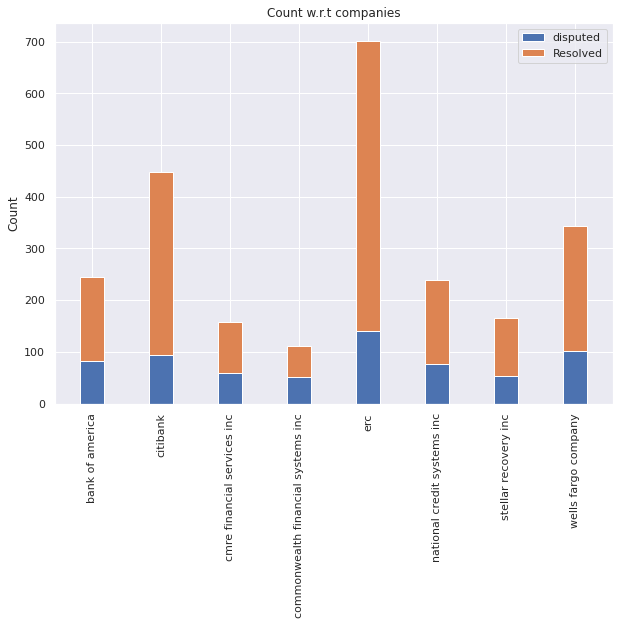

In [ ]:
labels=result['Company']


fig, ax = plt.subplots(figsize=(10,7))

width=0.35
ax.bar(labels,result['disputed'] , width, label='disputed')
ax.bar(labels,result['resolved'], width, bottom=result['disputed'], label='Resolved')

plt.xticks(rotation=90)
ax.set_ylabel('Count')
ax.set_title('Count w.r.t companies')
ax.legend()

plt.show()                                                        #here i can visualize company count of disputed and resolved customer
                                                                  #ERC company has the highest count of resolved customers whereas
                                                                  #commonwealth financial system inc has the lowest.

# Lets compare the count of disputed and resolved customer w.r.t product

In [ ]:
data3.head(n=3)

,Product,Issue,Complaint,Company public response,Company,Consumer consent?,Submitted via,Consumer disputed?
57874,Student loan,Can't repay my loan,This is a continuation of a previous issue wit...,Company chooses not to provide a public response,citibank,Consent provided,Web,No
57945,Payday loan,Can't stop charges to bank account,"I took out a Loan from Cash Central XXXX, Al f...",Company chooses not to provide a public response,community choice financial inc,Consent provided,Web,No
57988,Debt collection,Cont'd attempts collect debt not owed,I find this medical debt reported on my credit...,Company chooses not to provide a public response,healthcare llc,Consent provided,Web,No


In [ ]:
#I have created a new dataframe to check the disputed and resolved counts w.r.t to products.

product_analysis=pd.DataFrame(data3.groupby('Product')['Consumer disputed?'].value_counts())
product_analysis                                       #we can see here debt collection has the highest number of resolved customers. 

Consumer disputed?
Product         Consumer disputed?                    
Debt collection No                                8753
                Yes                               3062
Payday loan     No                                 338
                Yes                                 75
Student loan    No                                 850
                Yes                                255

In [ ]:
#converting the above data into dataframe

product_analysis=product_analysis.rename(columns={'Consumer disputed?':'count'})
product_analysis.reset_index(inplace=True)     

dummy=product_analysis   

In [ ]:
test=['Yes']
product_analysis= product_analysis[~product_analysis['Consumer disputed?'].isin(test)] 
product_analysis.reset_index(inplace=True)  #resolved

product_analysis.rename(columns={'Product': 'The Product'},inplace=True)
product_analysis['Resolved']=product_analysis['count']
product_analysis.drop(['index','Consumer disputed?','count'],axis=1,inplace=True)
product_analysis           #resolved cases data 

,The Product,Resolved
0,Debt collection,8753
1,Payday loan,338
2,Student loan,850


In [ ]:
#disputed customer data

test=['No']
dummy= dummy[~dummy['Consumer disputed?'].isin(test)] 
dummy.reset_index(inplace=True)
dummy['Disputed']=dummy['count']
dummy.drop(['index','Consumer disputed?','count'],axis=1,inplace=True)

#concatenated the two disputed and resolved casesd df into one.
product_result = pd.concat([product_analysis,dummy], axis=1, sort=False)
product_result.drop('Product',axis=1,inplace=True)
product_result

,The Product,Resolved,Disputed
0,Debt collection,8753,3062
1,Payday loan,338,75
2,Student loan,850,255


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

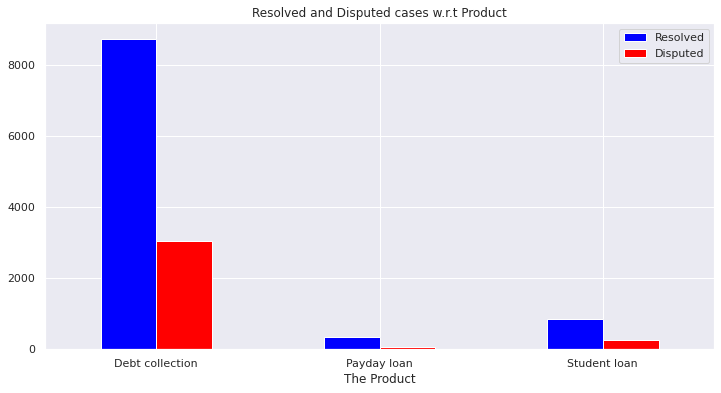

In [ ]:
product_result.set_index('The Product',inplace=True)
product_result.plot(kind='bar',figsize=(12, 6), title="Resolved and Disputed cases w.r.t Product", color=['Blue', 'red'])
plt.xticks(rotation='horizontal')

#our data has the most of the complaints from debt collection. around 35% of the complaints are non resolved.
#only a few complaints are from payday loan